# 프로젝트 주제 : 항공사 승객 만족도

> 데이터셋 : https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download

### EDA 및 데이터 전처리

In [577]:
# package install
pip install pandas
pip install matplotlib
pip install seaborn
pip install -U scikit-learn

SyntaxError: invalid syntax (3248009844.py, line 2)

In [579]:
# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

In [1387]:
# 데이터 import
import pandas as pd
train = pd.read_csv('../Project/dataset/train.csv')
test = pd.read_csv('../Project/dataset/test.csv')

In [1389]:
# 데이터 크기 확인(row, column)
train.shape

(103904, 25)

In [1391]:
# 데이터 확인
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


### 데이터 속성 정의
* `Gender` : 승객의 성별 (여자, 남자)
* `Customer Type` : 고객 유형(충성 고객, 불충성 고객)
* `Age` : 승객의 실제 나이
* `Type of Travel` : 승객의 비행 목적(개인 여행, 출장)
* `Class` : 승객의 여행 등급(비즈니스, 에코, 에코 플러스)
* `Flight distance` : 비행 거리
* `Inflight wifi service` : 기내 wifi 서비스 만족도 (0: 해당없음, 1-5)
* `Departure/Arrival time convenient` : 출발/도착 시간 편리성 만족도
* `Ease of Online booking` : 온라인 예약 만족도
* `Gate location` : 게이트 위치 만족도
* `Food and drink` : 음식 및 음료 만족도
* `Online boarding` : 온라인 탑승 만족도
* `Seat comfort` : 좌석 편안함 만족도
* `Inflight entertainment` : 기내 엔터테인먼트 만족도
* `On-board service` : 기내 서비스 만족도
* `Leg room service` : 레그룸 서비스 만족도
* `Baggage handling` : 수하물 취급 만족도
* `Check-in service` : 체크인 서비스 만족도
* `Inflight service` : 기내 서비스 만족도
* `Cleanliness` : 청결도 만족도
* `Departure Delay in Minutes` : 출발 지연시간(분)
* `Arrival Delay in Minutes` : 도착 지연시간(분)
* `Satisfaction` : 항공사 만족도(만족, 중립 또는 불만족)

### 데이터 전처리

In [1393]:
# 불필요 컬럼 제거
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)

In [1395]:
# 컬럼명 공백 제거
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

# 항공사 만족도 컬럼 수치 맵핑(중립 또는 불만족 : 0, 만족 : 1)
replace_dict = {'neutral or dissatisfied': 0, 'satisfied': 1}
train.replace(replace_dict, inplace=True)
test.replace(replace_dict, inplace=True)

In [1397]:
# 데이터 속성(feature) 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Gate_location                      103904 non-null  int64  
 10  Food_and_drink                     103904 non-null  int64  
 11  Online_boarding                    1039

In [164]:
# 데이터 요약
train.describe()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


* 평균 연령 : 39세
* 평균 비행거리 : 1189Km
* 평균 출발지연시간 : 14분
* 평균 도착지연시간 : 15분
* 서비스항목 중 가장 낮은 평점 : 기내 Wi-Fi(2.72)

In [1221]:
# 범주형 데이터의 도메인 값 확인
for col in train.columns:
    if train[col].dtype == 'object':
        categories = train[col].unique()
        print(f'[{col}] ({len(categories)})')
        print('\n'.join(categories))
        print()

[Gender] (2)
Male
Female

[Customer_Type] (2)
Loyal Customer
disloyal Customer

[Type_of_Travel] (2)
Personal Travel
Business travel

[Class] (3)
Eco Plus
Business
Eco



In [59]:
# import matplotlib, 한글폰트 적용
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname='/Users/jaemin/Library/Fonts/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='Nanum Gothic')                                  # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)                      # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 14, 'font.family': 'Nanum Gothic'}) # 폰트 설정

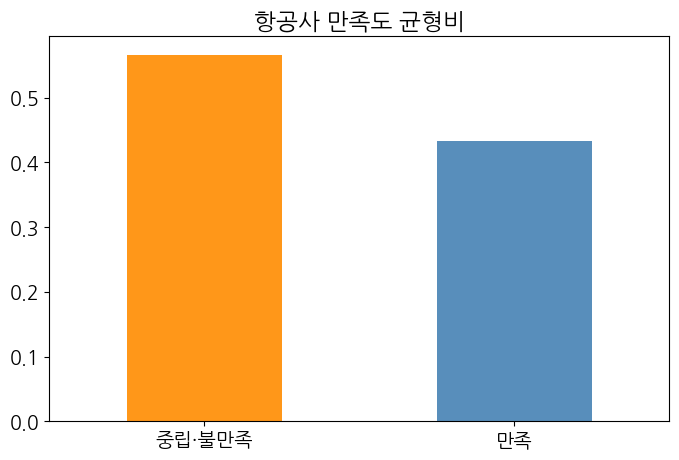

In [65]:
# 데이터 균형도 확인(만족, 불만족)
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize=True).rename(index={0: '중립・불만족', 1: '만족'}).plot(
    kind='bar', color=['darkorange', 'steelblue'], alpha=0.9, rot=0
)
plt.xlabel('')
plt.title('항공사 만족도 균형비')
plt.show()

* 항공사 만족도는 중립・불만족 약 55%, 만족 45%로 균형적인 답변을 보임
* 따라서 데이터에 대한 특별한 처리/리샘플링이 불필요한 것으로 판단

In [90]:
# 결손데이터 전처리

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Gender,0,0.0
Seat_comfort,0,0.0
Arrival_Delay_in_Minutes,0,0.0
Departure_Delay_in_Minutes,0,0.0
Cleanliness,0,0.0
Inflight_service,0,0.0
Checkin_service,0,0.0
Baggage_handling,0,0.0
Leg_room_service,0,0.0
On-board_service,0,0.0


In [94]:
# 도착지연시간 결측값 평균값으로 채우기
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())

In [170]:
# 단변량 분석
num_columns = ['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
print(num_columns)

['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']


In [421]:
# 전체 데이터에서 샘플 1000개 추출
sample_data = train.sample(1000)
sample_data

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
15258,Male,Loyal Customer,53,Business travel,Business,2989,1,1,1,1,...,2,2,2,2,3,2,3,11,1.0,1
27067,Female,Loyal Customer,46,Business travel,Eco,544,4,3,3,3,...,4,4,4,4,1,4,2,0,0.0,1
100628,Female,Loyal Customer,27,Business travel,Business,1129,5,5,5,5,...,5,3,5,4,5,5,5,0,0.0,1
60908,Female,Loyal Customer,57,Business travel,Business,3130,2,2,2,2,...,5,5,5,5,4,5,3,0,0.0,1
34265,Female,Loyal Customer,52,Business travel,Business,1915,5,3,5,5,...,5,5,5,5,5,5,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94259,Male,Loyal Customer,40,Personal Travel,Eco Plus,627,3,1,3,4,...,5,2,1,3,3,4,5,34,53.0,0
48219,Female,Loyal Customer,66,Personal Travel,Eco,599,3,3,3,3,...,3,2,4,4,2,2,2,158,153.0,0
741,Male,disloyal Customer,15,Business travel,Business,1039,0,0,0,3,...,5,4,5,4,4,4,5,4,0.0,1
66245,Male,Loyal Customer,52,Business travel,Business,1217,1,1,1,1,...,4,4,4,4,4,4,5,0,12.0,1


### 단변량 분석

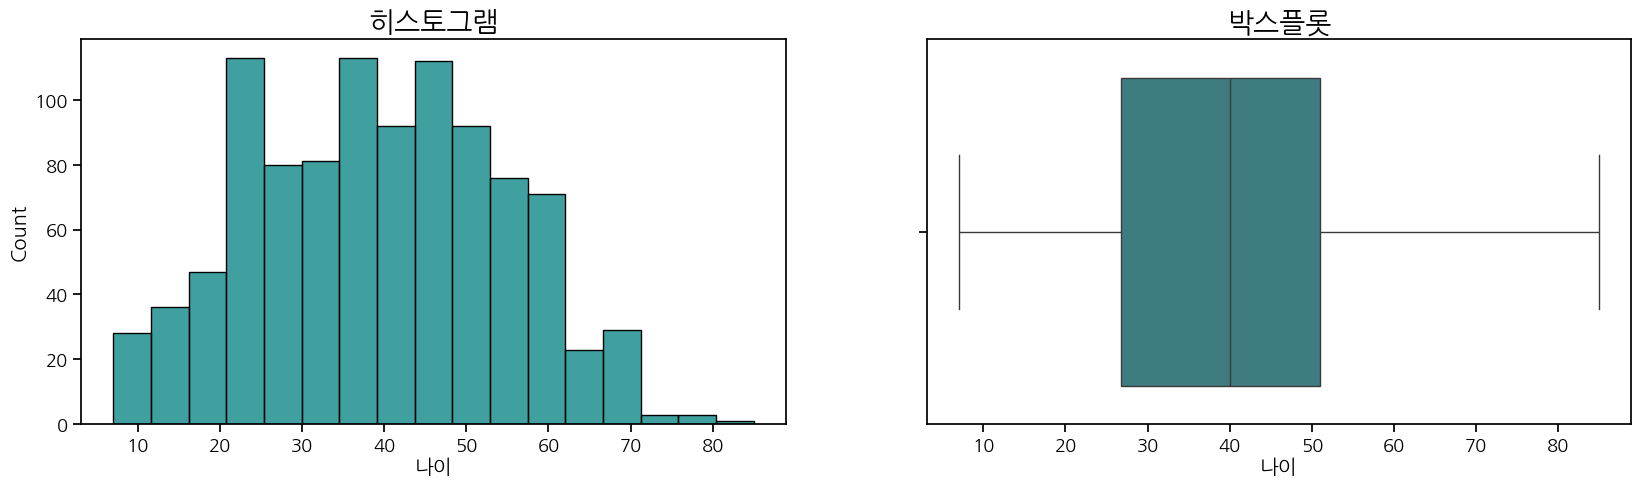

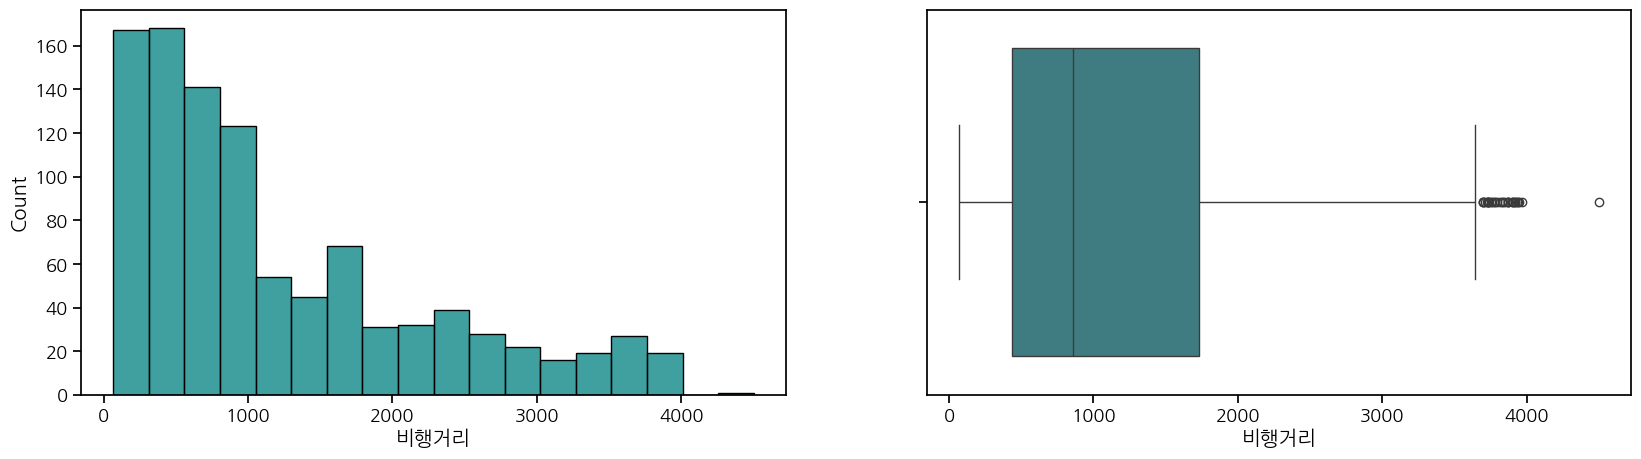

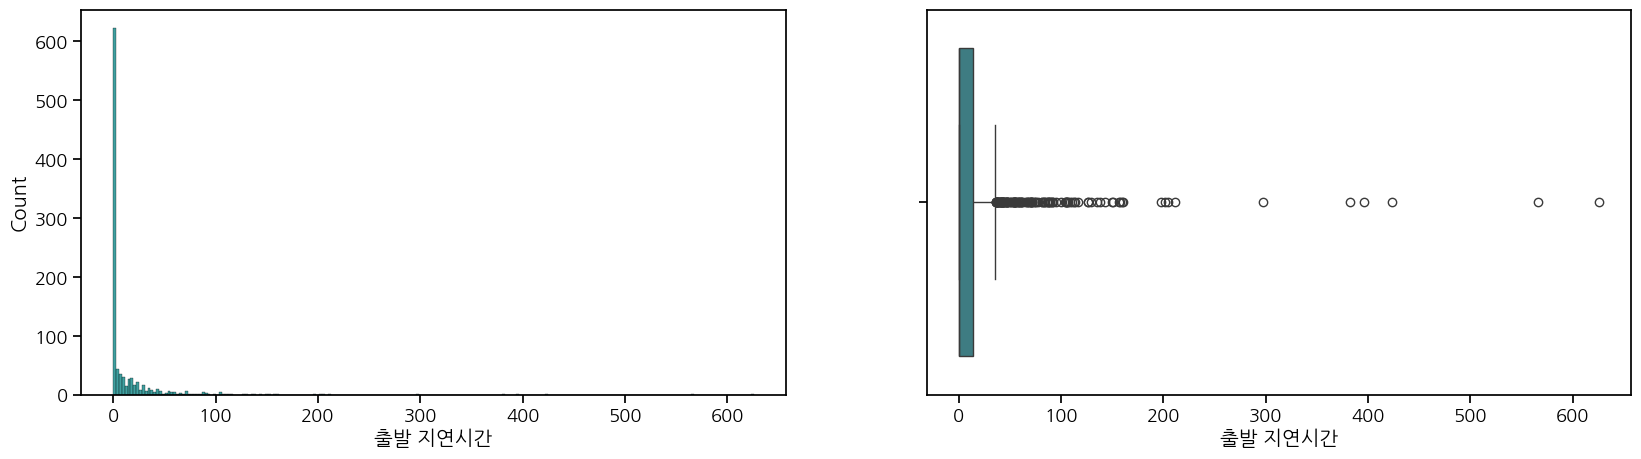

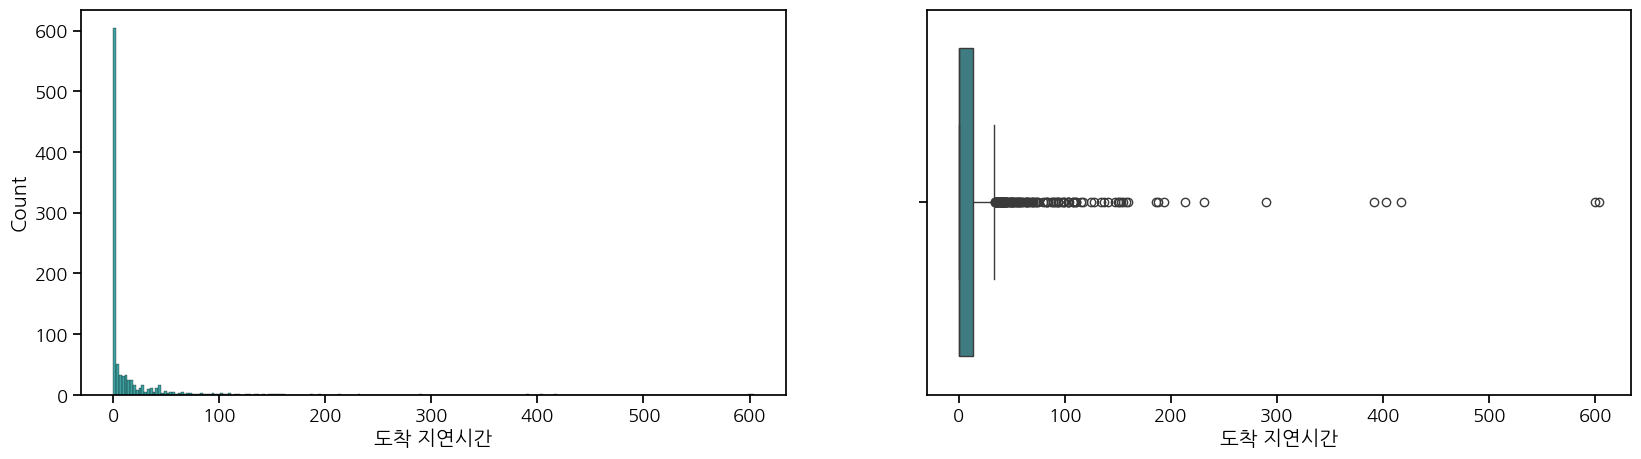

In [583]:
import seaborn as sns
sns.set_context('notebook', font_scale= 1.2)
kor_columns = ['나이', '비행거리', '출발 지연시간', '도착 지연시간']
for idx, col in enumerate(num_columns):
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    # 타이틀
    if (idx == 0):
        ax[0].set_title('히스토그램', fontsize=20)
        ax[1].set_title('박스플롯', fontsize=20)
    sns.histplot(sample_data[col], ax = ax[0], color= 'teal')
    ax[0].set_xlabel(kor_columns[idx])
    sns.boxplot(x = sample_data[col], ax= ax[1], palette= 'crest')
    ax[1].set_xlabel(kor_columns[idx])

* 승객 연령대는 20대 후반 ~ 50대에 초반에 많이 분포
* 비행거리는 대부분 1,000Km 안쪽으로 분포 했으며 4,000Km를 넘는 항공편이 몇 존재
* 대부분의 항공편은 지연이 없어 출발・도착 지연시간 모두 0분으로 편향됨

[Text(0, 0, '비즈니스'), Text(1, 0, '에코'), Text(2, 0, '에코플러스')]

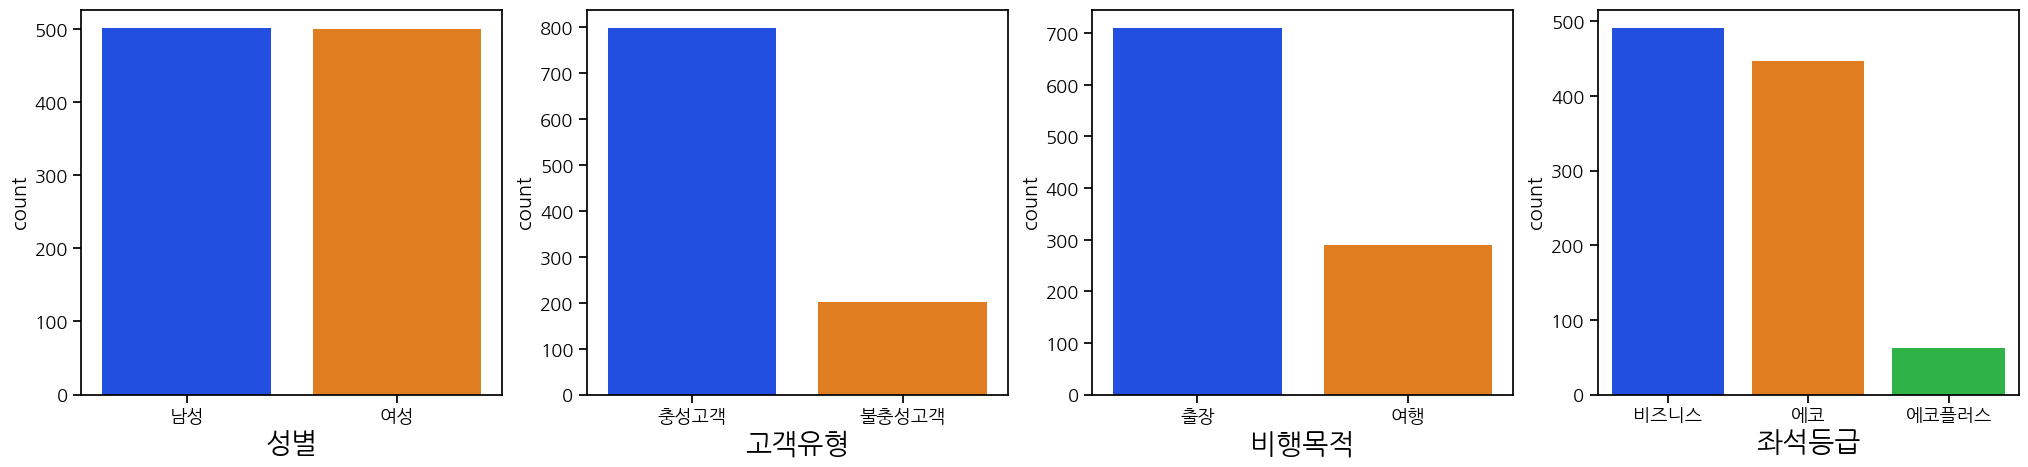

In [585]:
fig, axes = plt.subplots(1, 4, figsize = (25, 5))
sns.countplot(x = 'Gender', data = sample_data, palette= 'bright', ax = axes[0]);         # 성별
axes[0].set_xlabel('성별', fontsize=20)
axes[0].set_xticklabels(['남성', '여성'])
sns.countplot(x = 'Customer_Type', data = sample_data, palette= 'bright', ax = axes[1]);  # 고객유형
axes[1].set_xlabel('고객유형', fontsize=20)
axes[1].set_xticklabels(['충성고객', '불충성고객'])
sns.countplot(x = 'Type_of_Travel', data = sample_data, palette= 'bright', ax = axes[2]); # 비행목적
axes[2].set_xlabel('비행목적', fontsize=20)
axes[2].set_xticklabels(['출장', '여행'])
sns.countplot(x = 'Class', data = sample_data, palette= 'bright', ax = axes[3]);          # 좌석등급
axes[3].set_xlabel('좌석등급', fontsize=20)
axes[3].set_xticklabels(['비즈니스', '에코', '에코플러스'])

Text(0, 0.5, '')

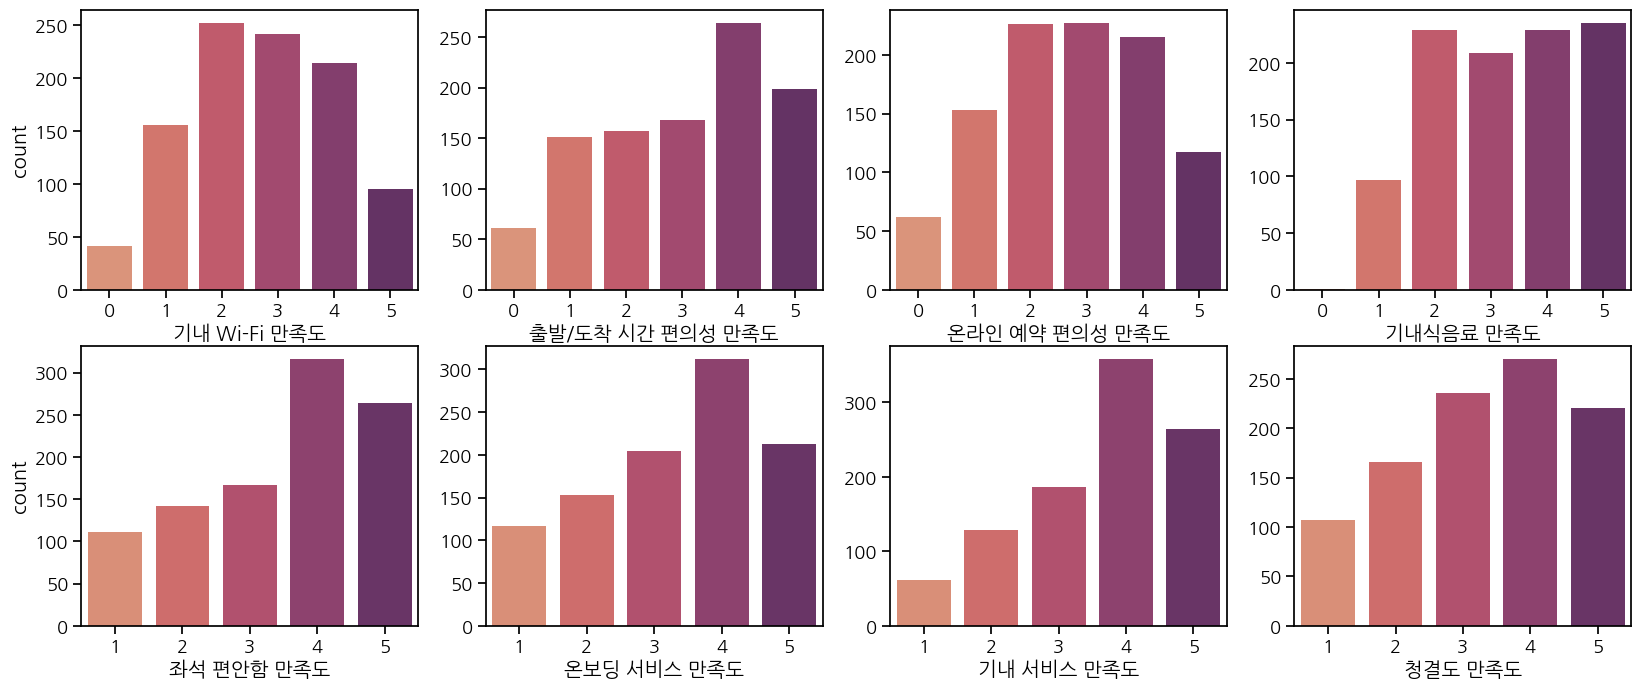

In [587]:
fig, axes = plt.subplots(2, 4, figsize = (20, 8))
sns.countplot(x = 'Inflight_wifi_service', data = sample_data, palette= 'flare', ax = axes[0, 0]);             # 기내 Wi-Fi 서비스 만족도
axes[0, 0].set_xlabel('기내 Wi-Fi 만족도')
sns.countplot(x = 'Departure/Arrival_time_convenient', data = sample_data, palette= 'flare', ax = axes[0, 1]); # 출발/도착 시간 편의성 만족도
axes[0, 1].set_xlabel('출발/도착 시간 편의성 만족도')
axes[0, 1].set_ylabel('')
sns.countplot(x = 'Ease_of_Online_booking', data = sample_data, palette= 'flare', ax = axes[0, 2]);            # 온라인 예약 만족도
axes[0, 2].set_xlabel('온라인 예약 편의성 만족도')
axes[0, 2].set_ylabel('')
sns.countplot(x = 'Food_and_drink', data = sample_data, palette= 'flare', ax = axes[0, 3]);                    # 기내식 만족도
axes[0, 3].set_xlabel('기내식음료 만족도')
axes[0, 3].set_ylabel('')

sns.countplot(x = 'Seat_comfort', data = sample_data, palette= 'flare', ax = axes[1, 0]);                      # 좌석 만족도
axes[1, 0].set_xlabel('좌석 편안함 만족도')
sns.countplot(x = 'On-board_service', data = sample_data, palette= 'flare', ax = axes[1, 1]);                  # 온보딩 서비스 만족도
axes[1, 1].set_xlabel('온보딩 서비스 만족도')
axes[1, 1].set_ylabel('')
sns.countplot(x = 'Inflight_service', data = sample_data, palette= 'flare', ax = axes[1, 2]);                  # 기내 서비스 만족도
axes[1, 2].set_xlabel('기내 서비스 만족도')
axes[1, 2].set_ylabel('')
sns.countplot(x = 'Cleanliness', data = sample_data, palette= 'flare', ax = axes[1, 3]);                       # 청결도 만족도
axes[1, 3].set_xlabel('청결도 만족도')
axes[1, 3].set_ylabel('')

* 만족도 평가 중 식음료(기내식) 서비스가 가장 균등한 분포를 보임
* 기내 Wi-Fi, 온라인 예약 편의성이 낮은 만족도를 보임
* 출발/도착 시간 편의성, 좌석 편의성, 온보딩 서비스가 높은 만족도를 보임

### 다변량 분석(변수 간 상관관계 분석)

<Axes: >

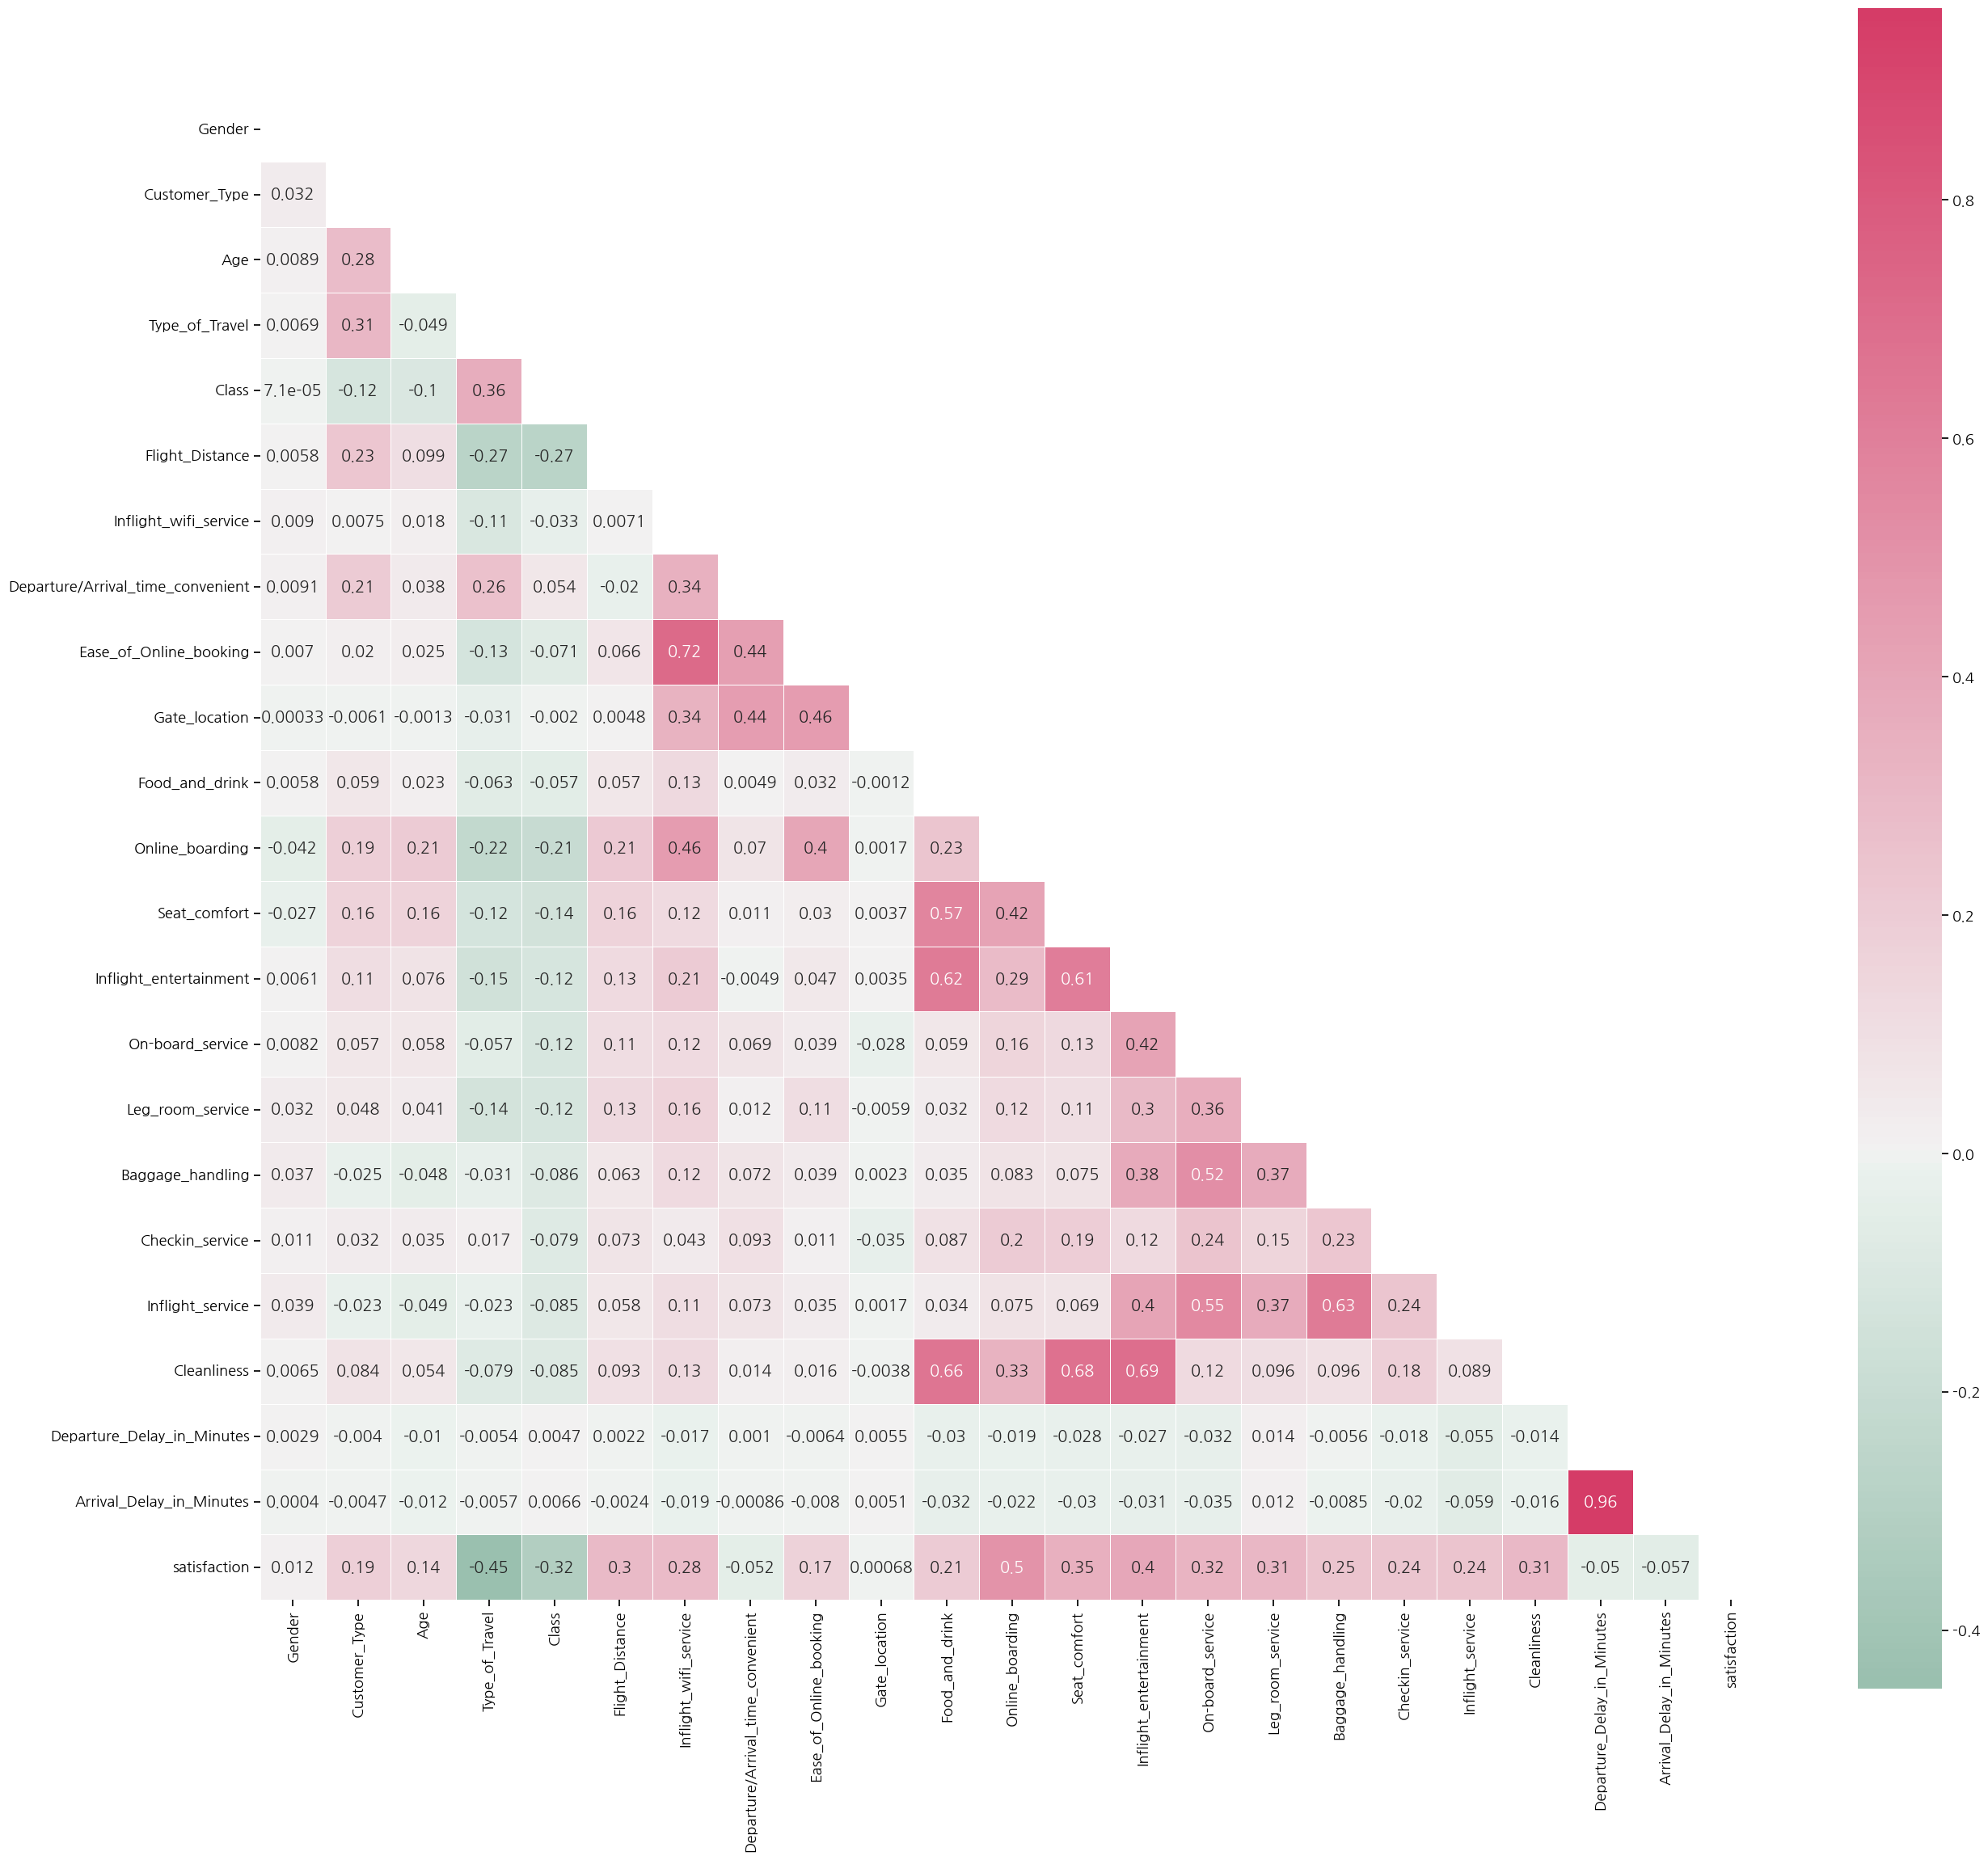

In [589]:
# 변수 간 상관관계 분석
# 범주형 변수 인코딩
corr_data = train.replace({'Male' : 1, 'Female' : 0,
                           'Loyal Customer' : 1, 'disloyal Customer' : 0,
                           'Personal Travel' : 1, 'Business travel' : 0,
                           'Eco Plus' : 0, 'Business' : 1, 'Eco' :2})
corr = corr_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

* 출발 지연시간, 도착 지연시간 간의 상관관계가 가장 높음

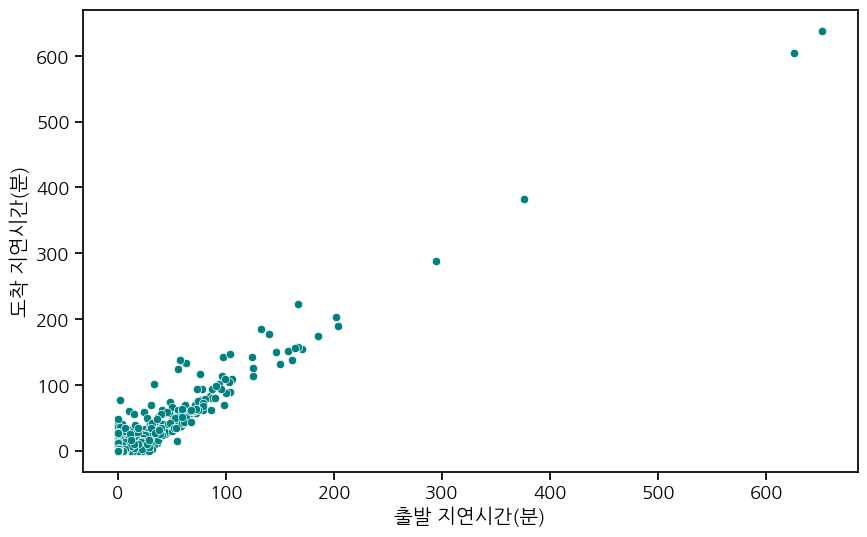

In [410]:
# 출발 지연시간, 도착 지연시간 간 상관관계

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure_Delay_in_Minutes', y = 'Arrival_Delay_in_Minutes', data = sample_data, color = 'teal')
plt.xlabel('출발 지연시간(분)')
plt.ylabel('도착 지연시간(분)')
plt.show()

### 속성 별 만족/불만족 분석

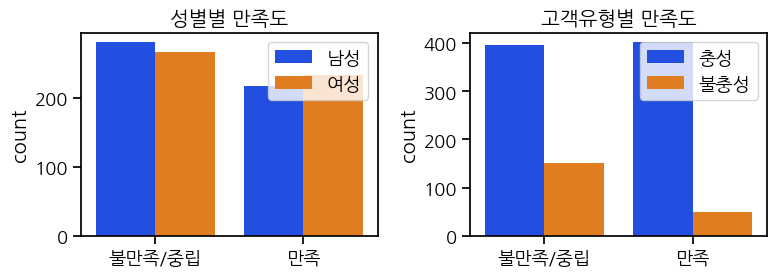

In [617]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# 성별별 만족도
sns.countplot(x="satisfaction", hue="Gender", data=sample_data, ax=axes[0], palette='bright')
axes[0].set_xlabel('')
axes[0].set_xticklabels(['불만족/중립', '만족'])
axes[0].set_title('성별별 만족도')
axes[0].legend(['남성', '여성'])

# 고객유형별 만족도
sns.countplot(x="satisfaction", hue="Customer_Type", data=sample_data, ax=axes[1], palette='bright')
axes[1].set_xlabel('')
axes[1].set_xticklabels(['불만족/중립', '만족'])
axes[1].set_title('고객유형별 만족도')
axes[1].legend(['충성', '불충성'])

plt.tight_layout()
plt.show()

* 남성/여성 비율은 비슷하며 불만족/만족 비율도 비슷하다
* 충성고객의 비율이 훨씬 높다, 충성고객은 불만족/만족 비율이 비슷하지만 불충성고객은 불만족 비율이 높다

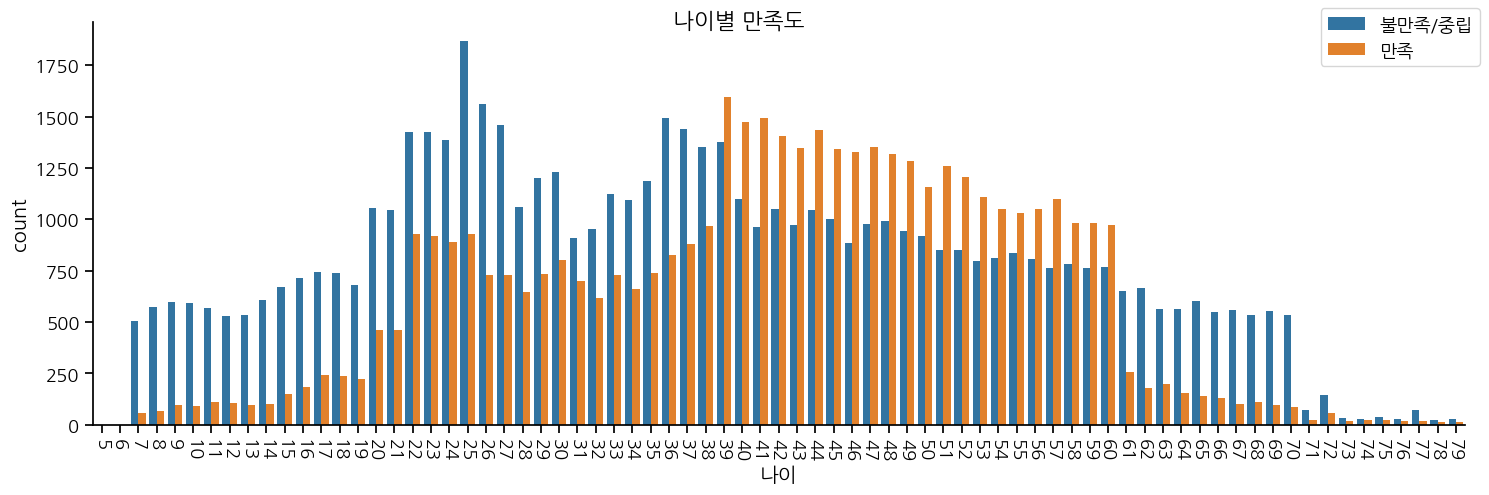

In [636]:
# 나이별 만족도
g = sns.catplot(x="Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80), legend=False)
g.set_axis_labels('나이', 'count')
g.set_xticklabels(g.ax.get_xticklabels(), rotation=270)
g.fig.suptitle('나이별 만족도', fontsize=16)
g.fig.legend(['불만족/중립', '만족'], title='')
plt.show()

* 39~60세에서 만족도가 가장 높다
* 그 외 연령대에선 불만족/중립 비율이 높게 나타났다

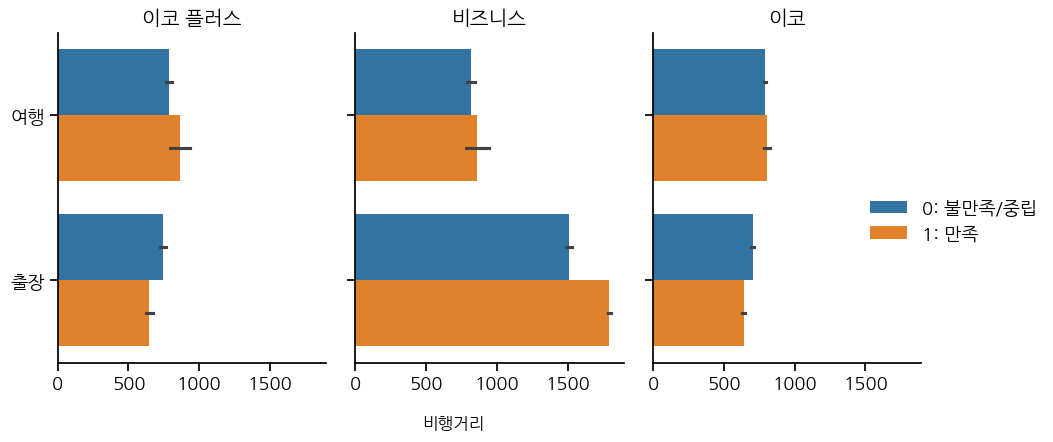

In [811]:
# 비행거리에 따른 여행유형・좌석등급별 만족도
g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction",
                col="Class", data=train, kind="bar", height=4.5, aspect=.8)
g.set_axis_labels('', '')
g.fig.text(0.5, 0.02, '비행거리', ha='center', fontsize=12)

titles = ['이코 플러스', '비즈니스', '이코']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    ax.set_yticklabels(['여행', '출장'])
    
g.legend.set_title('')
for text, label in zip(g.legend.texts, ['0: 불만족/중립', '1: 만족']):
    text.set_text(label)

* 비행거리가 길어질수록 비즈니스 좌석 이용수가 많아짐
* 비즈니스 좌석의 경우 비행거리가 길어질수록 만족률이 높음

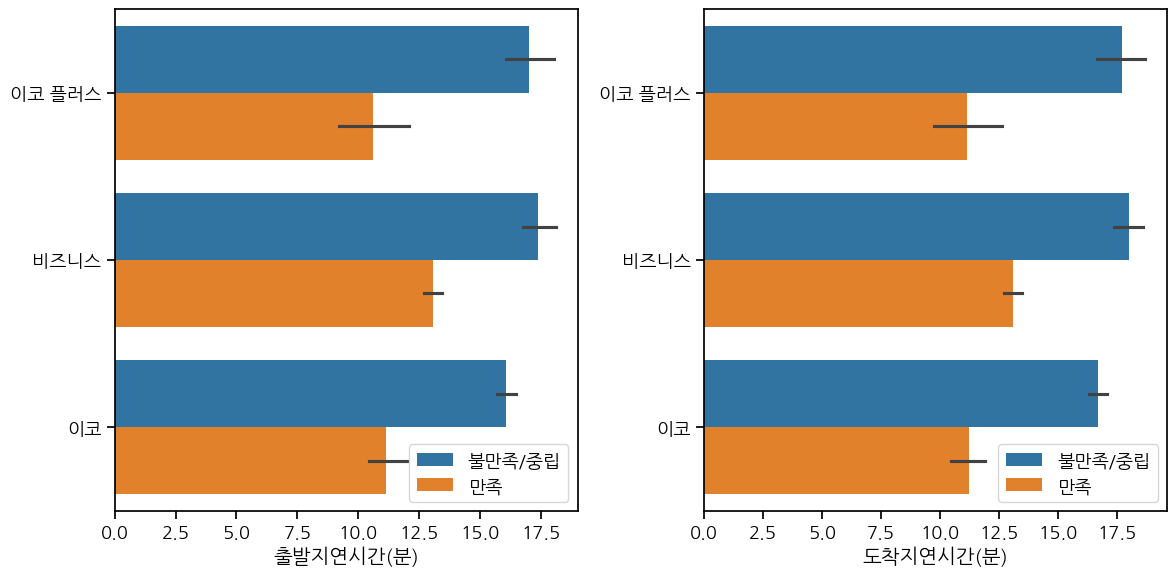

In [847]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 출발지연시간에 따른 좌석등급별 만족도
sns.barplot(x="Departure_Delay_in_Minutes", y="Class", hue="satisfaction", data=train, ax=axes[0], legend=True)
axes[0].set_xlabel('출발지연시간(분)')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['이코 플러스', '비즈니스', '이코'])
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=['불만족/중립', '만족'], title='')

# 도착지연시간에 따른 좌석등급별 만족도
sns.barplot(x="Arrival_Delay_in_Minutes", y="Class", hue="satisfaction", data=train, ax=axes[1])
axes[1].set_xlabel('도착지연시간(분)')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['이코 플러스', '비즈니스', '이코'])
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['불만족/중립', '만족'], title='')

plt.tight_layout()
plt.show()

* 좌석등급에 상관없이 출발/도착 지연시간이 길어질수록 대체로 불만족한다.

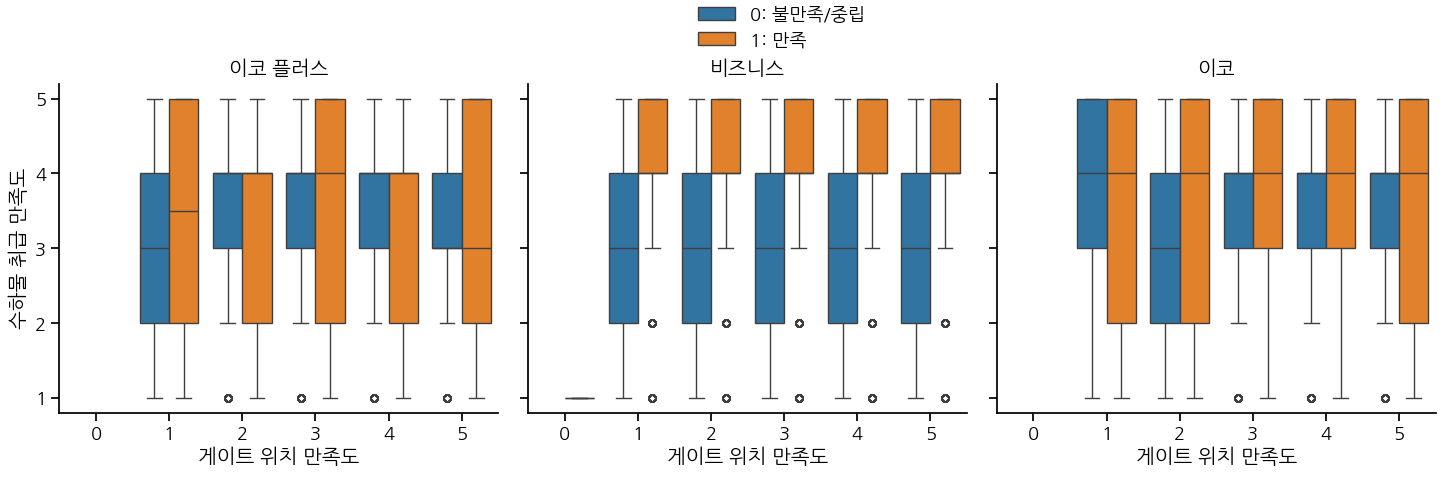

In [981]:
# 좌석등급에 따른 게이트 위치, 수하물 취급 만족도 별 만족도
g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction",
                col='Class', data=train, kind="box", height=4.5, aspect=1.0)
titles = ['이코 플러스', '비즈니스', '이코']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
g.set_axis_labels('게이트 위치 만족도', '수하물 취급 만족도')
g.legend.set_title('')
for text, label in zip(g.legend.texts, ['0: 불만족/중립', '1: 만족']):
    text.set_text(label)
g.legend.set_bbox_to_anchor((0.6, 1))
plt.tight_layout()

* 이코, 이코플러스 등급은 대체로 만족
* 이코, 이코플러스 등급은 수하물 취급이 좋아도 게이트 위치가 불편하면 불만족
* 비즈니스 등급의 경우 게이트 위치에 크게 관여하지 않고 수하물 취급이 좋을수록 만족

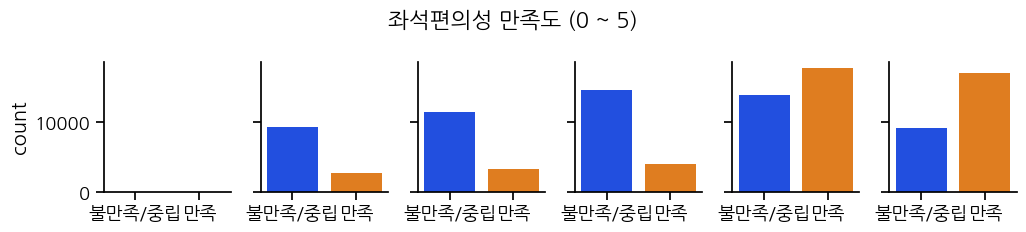

In [1086]:
# 좌석만족도 별 만족도
g = sns.catplot(x="satisfaction", col="Seat_comfort", col_wrap=6,
                data=train, kind="count", height=2.5, aspect=.7, palette='bright')
g.set_axis_labels('', 'count')
g.fig.suptitle('좌석편의성 만족도 (0 ~ 5)', fontsize=16, y=1.03)
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xticklabels(['불만족/중립', '만족'])

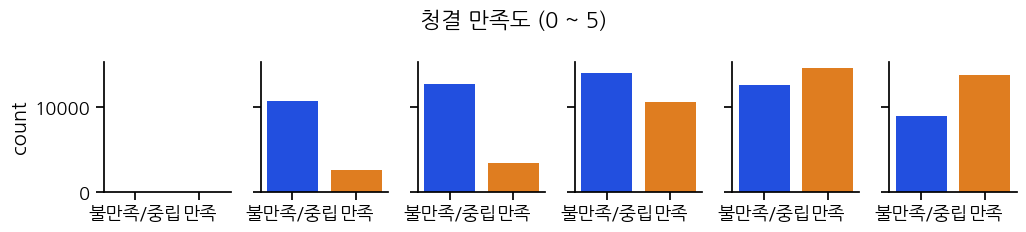

In [1070]:
# 청결만족도 별 만족도
g = sns.catplot(x="satisfaction", col="Cleanliness", col_wrap=6,
                data=train, kind="count", height=2.5, aspect=.7, palette='bright')
g.set_axis_labels('', 'count')
g.fig.suptitle('청결 만족도 (0 ~ 5)', 
               fontsize=16, y=1.03)
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xticklabels(['불만족/중립', '만족'])

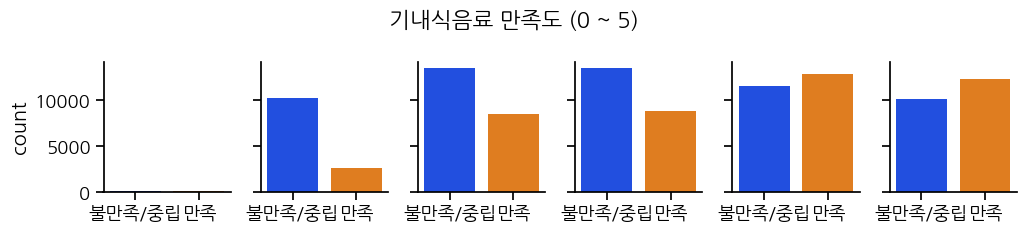

In [1088]:
# 기내식음료만족도 별 만족도
g = sns.catplot(x="satisfaction", col="Food_and_drink", col_wrap=6,
                data=train, kind="count", height=2.5, aspect=.7, palette='bright')
g.set_axis_labels('', 'count')
g.fig.suptitle('기내식음료 만족도 (0 ~ 5)', 
               fontsize=16, y=1.03)
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xticklabels(['불만족/중립', '만족'])

* 좌석편의성, 청결도, 기내식음료의 경우 3점 이하의 평가에서는 대체로 불만족
* 4점 이상의 평가에서 만족 비율이 높아짐

### KNN Classification

In [1399]:
# 무응답 또는 의미없는 답변(0) 전처리
columns_containing_0 = ['Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
                        'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
                        'On-board_service', 'Leg_room_service', 'Checkin_service', 'Inflight_service', 'Cleanliness']
modes = train[columns_containing_0].mode()
modes = test[columns_containing_0].mode()
train[columns_containing_0] = train[columns_containing_0].replace({'0': modes})
test[columns_containing_0] = test[columns_containing_0].replace({'0': modes})

In [1381]:
train.nunique()

Gender                                  2
Customer_Type                           2
Age                                    75
Type_of_Travel                          2
Class                                   3
Flight_Distance                      3802
Inflight_wifi_service                   6
Departure/Arrival_time_convenient       6
Ease_of_Online_booking                  6
Gate_location                           6
Food_and_drink                          6
Online_boarding                         6
Seat_comfort                            6
Inflight_entertainment                  6
On-board_service                        6
Leg_room_service                        6
Baggage_handling                        5
Checkin_service                         6
Inflight_service                        6
Cleanliness                             6
Departure_Delay_in_Minutes            446
Arrival_Delay_in_Minutes              455
satisfaction                            2
dtype: int64

In [1401]:
# 비행거리 로그적용, 왜곡 줄이기
train['Flight_Distance'] = np.log1p(train['Flight_Distance'])
test['Flight_Distance'] = np.log1p(test['Flight_Distance'])
print(train['Flight_Distance'])

0         6.133398
1         5.463832
2         7.041412
3         6.333280
4         5.370638
            ...   
103899    5.262690
103900    7.761319
103901    7.598900
103902    6.908755
103903    7.452402
Name: Flight_Distance, Length: 103904, dtype: float64


In [1403]:
# 범주형 변수 라벨 인코딩
train['Gender'] = train['Gender'].map({'Male' : 0, 'Female' : 1})
train['Customer_Type'] = train['Customer_Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
train['Type_of_Travel'] = train['Type_of_Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
train['Class'] = train['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
test['Gender'] = test['Gender'].map({'Male' : 0, 'Female' : 1})
test['Customer_Type'] = test['Customer_Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
test['Type_of_Travel'] = test['Type_of_Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
test['Class'] = test['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})

In [1405]:
print(train['Gender'].unique())
print(train['Customer_Type'].unique())
print(train['Type_of_Travel'].unique())
print(train['Class'].unique())
print(train['satisfaction'].unique())

[0 1]
[0 1]
[0 1]
[1 2 0]
[0 1]


### Feature Scaling

In [1407]:
X_train = train.drop('satisfaction', axis = 1)
y_train = train.satisfaction

X_test = test.drop('satisfaction', axis=1)
y_test = test.satisfaction

In [1409]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [1415]:
print(X_train)
print(y_train)

[[-1.01503056 -0.4727667  -1.7452793  ...  1.30586973  0.26639265
   0.0729052 ]
 [-1.01503056  2.11520819 -0.95136024 ... -1.74229153 -0.36137482
  -0.23718437]
 [ 0.98519201 -0.4727667  -0.88520032 ...  1.30586973 -0.3875318
  -0.39222916]
 ...
 [-1.01503056  2.11520819 -0.62056063 ...  0.54382941 -0.20443295
  -0.03045799]
 [ 0.98519201  2.11520819 -1.14984    ... -1.74229153 -0.3875318
  -0.39222916]
 [-1.01503056 -0.4727667  -0.8190404  ... -1.74229153 -0.3875318
  -0.39222916]]
0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64


In [1417]:
from sklearn.impute import SimpleImputer

# 결측치 imputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [1421]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("훈련 데이터 정확도:", round(score, 3))

훈련 데이터 정확도: 0.925


In [1429]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
print("테스트 데이터 정확도:", round(accuracy_score(y_test, y_pred), 3))

테스트 데이터 정확도: 0.926


In [1445]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.94      0.89      0.91     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976



### 최적의 K 값 찾기

In [1450]:
accuracy = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    accuracy.append(accuracy_i)

print(accuracy)

[0.9165383430859255, 0.9123806590699107, 0.9259316291961811, 0.9231213427779489, 0.9301663073606405, 0.924853711117955, 0.9296658453957499, 0.9260856174930705, 0.9298198336926393, 0.9256621496766245, 0.9295503541730828, 0.9265475823837388, 0.9286264243917463, 0.9268170619032954]


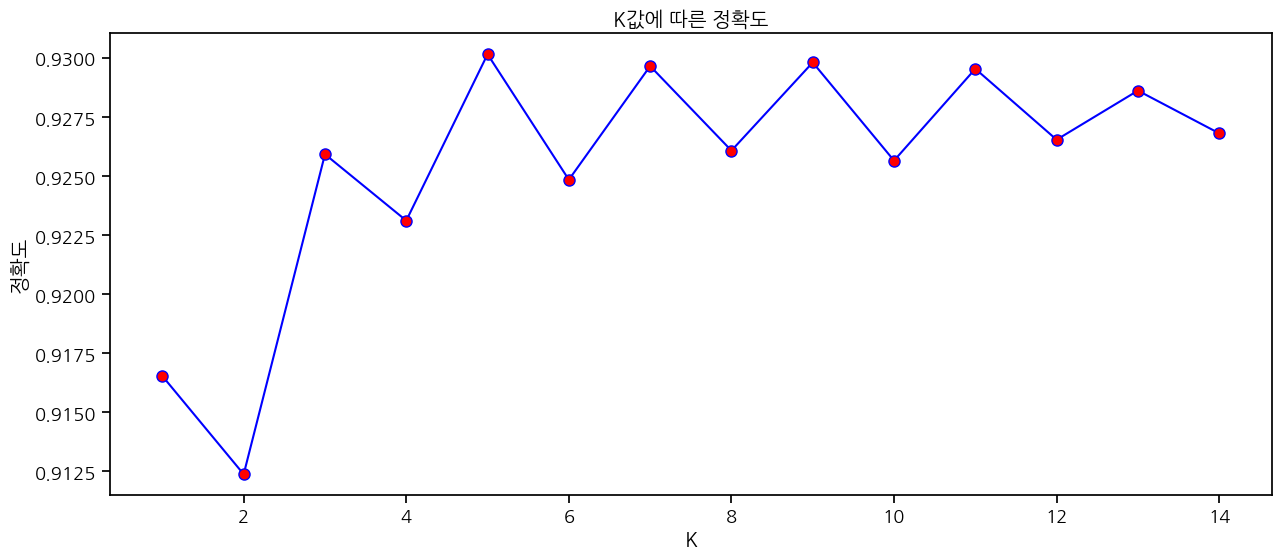

In [1466]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='solid', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('K값에 따른 정확도')
plt.xlabel('K')
plt.ylabel('정확도')
plt.show()

* K값이 5일 때 정확도는 0.9301663073606405로 가장 높은 것을 확인

In [1473]:
# 최적의 K값인 5로 모델 재학습

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [1479]:
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {round(accuracy * 100, 2)}%")

정확도: 93.02%


In [1493]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.95      0.89      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



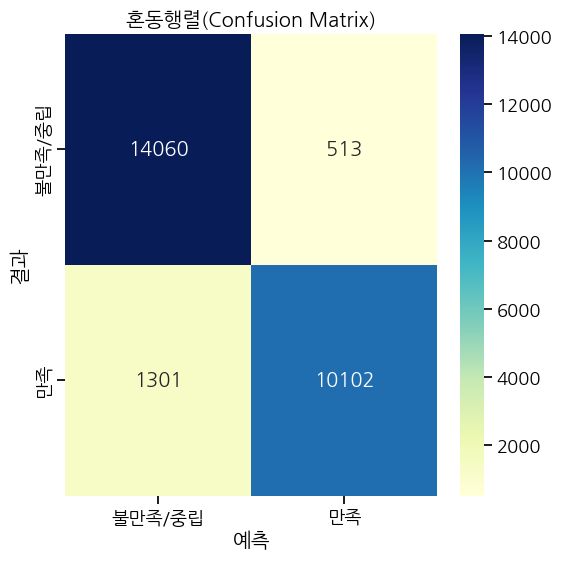

In [1547]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동행렬 그래프
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['불만족/중립', '만족'], yticklabels=['불만족/중립', '만족'])
plt.xlabel('예측')
plt.ylabel('결과')
plt.title('혼동행렬(Confusion Matrix)')
plt.show()

### 혼동행렬 지표 분석

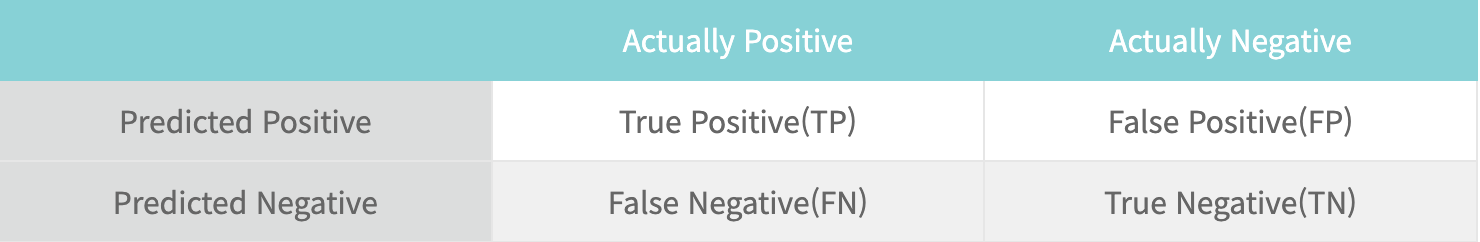
* TP(True Positive) : 10102
* TN(True Negative) : 14060
* FP(False Positive) : 513
* FN(False Negative) : 1301

* 정확도 : 0.93, 93%
* 정밀도 : 0.95, 95%
* 민감도 : 0.88, 88%